In [ ]:
pip install ucimlrepo

In [ ]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

#LINEAR REGERESSION ANALYSIS (AUTOMOBILE)

#import

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
Xlia = automobile.data.features
ylia = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

# DATA PRE-PROCESSING + EDA

In [ ]:
Xlia

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore fuel-system  engine-size  ...  length wheel-base  \
0      2.68  3.47        mpfi          130  ...   168.8       88.6   
1      2.68  3.47        mpfi          130  ...   168.8       88.6   
2      3.47  2.68        mpfi          152  ...   171.2       94.5   
3      3.40  3.19        mpfi          109  ...   176.6       99.8   
4      3.40  3.19        mpfi          136  ...   176.6       99.4   
..      ...   ...         ...          ...  ...     ...        ...   
200    3.15  3.78        mpfi          141  ...   188.8      109.1   
201    3.15  3.78        mpfi          141  ...   188.8      109.1   
202    2.87  3.58        mpfi          173  ...   188.8      109.1   
203    3.40  3.01         idi          145  ...   188.8      109.1   
204    3.15  3.78        mpfi          141  ...   188.8      109.1   

     engine-location  drive-wheels   body-style  num-of-doors  aspiration  \
0              front           rwd  convertible           2.0         std   
1              front           rwd  convertible           2.0         std   
2              front           rwd    hatchback           2.0         std   
3              front           fwd        sedan           4.0         std   
4              front           4wd        sedan           4.0         std   
..               ...           ...          ...           ...         ...   
200            front           rwd        sedan           4.0         std   
201            front           rwd        sedan           4.0       turbo   
202            front           rwd        sedan           4.0         std   
203            front           rwd        sedan           4.0       turbo   
204            front           rwd        sedan           4.0       turbo   

    fuel-type         make normalized-losses  
0         gas  alfa-romero               NaN  
1         gas  alfa-romero               NaN  
2         gas  alfa-romero               NaN  
3         gas         audi             164.0  
4         gas         audi             164.0  
..        ...          ...               ...  
200       gas        volvo              95.0  
201       gas        volvo              95.0  
202       gas        volvo              95.0  
203    diesel        volvo              95.0  
204       gas        volvo              95.0  

[205 rows x 25 columns]

In [ ]:
ylia

symboling
0            3
1            3
2            1
3            2
4            2
..         ...
200         -1
201         -1
202         -1
203         -1
204         -1

[205 rows x 1 columns]

In [ ]:
ae = pd.concat([Xlia,ylia], axis=1)

In [ ]:
ae

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
0      2.68  3.47        mpfi          130  ...        88.6           front   
1      2.68  3.47        mpfi          130  ...        88.6           front   
2      3.47  2.68        mpfi          152  ...        94.5           front   
3      3.40  3.19        mpfi          109  ...        99.8           front   
4      3.40  3.19        mpfi          136  ...        99.4           front   
..      ...   ...         ...          ...  ...         ...             ...   
200    3.15  3.78        mpfi          141  ...       109.1           front   
201    3.15  3.78        mpfi          141  ...       109.1           front   
202    2.87  3.58        mpfi          173  ...       109.1           front   
203    3.40  3.01         idi          145  ...       109.1           front   
204    3.15  3.78        mpfi          141  ...       109.1           front   

     drive-wheels   body-style  num-of-doors  aspiration  fuel-type  \
0             rwd  convertible           2.0         std        gas   
1             rwd  convertible           2.0         std        gas   
2             rwd    hatchback           2.0         std        gas   
3             fwd        sedan           4.0         std        gas   
4             4wd        sedan           4.0         std        gas   
..            ...          ...           ...         ...        ...   
200           rwd        sedan           4.0         std        gas   
201           rwd        sedan           4.0       turbo        gas   
202           rwd        sedan           4.0         std        gas   
203           rwd        sedan           4.0       turbo     diesel   
204           rwd        sedan           4.0       turbo        gas   

            make normalized-losses symboling  
0    alfa-romero               NaN         3  
1    alfa-romero               NaN         3  
2    alfa-romero               NaN         1  
3           audi             164.0         2  
4           audi             164.0         2  
..           ...               ...       ...  
200        volvo              95.0        -1  
201        volvo              95.0        -1  
202        volvo              95.0        -1  
203        volvo              95.0        -1  
204        volvo              95.0        -1  

[205 rows x 26 columns]

In [ ]:
ae.info()
print('\n',ae.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [ ]:
ae.set_index('make')

price  highway-mpg  city-mpg  peak-rpm  horsepower  \
make                                                                
alfa-romero  13495.0           27        21    5000.0       111.0   
alfa-romero  16500.0           27        21    5000.0       111.0   
alfa-romero  16500.0           26        19    5000.0       154.0   
audi         13950.0           30        24    5500.0       102.0   
audi         17450.0           22        18    5500.0       115.0   
...              ...          ...       ...       ...         ...   
volvo        16845.0           28        23    5400.0       114.0   
volvo        19045.0           25        19    5300.0       160.0   
volvo        21485.0           23        18    5500.0       134.0   
volvo        22470.0           27        26    4800.0       106.0   
volvo        22625.0           25        19    5400.0       114.0   

             compression-ratio  stroke  bore fuel-system  engine-size  ...  \
make                                                                   ...   
alfa-romero                9.0    2.68  3.47        mpfi          130  ...   
alfa-romero                9.0    2.68  3.47        mpfi          130  ...   
alfa-romero                9.0    3.47  2.68        mpfi          152  ...   
audi                      10.0    3.40  3.19        mpfi          109  ...   
audi                       8.0    3.40  3.19        mpfi          136  ...   
...                        ...     ...   ...         ...          ...  ...   
volvo                      9.5    3.15  3.78        mpfi          141  ...   
volvo                      8.7    3.15  3.78        mpfi          141  ...   
volvo                      8.8    2.87  3.58        mpfi          173  ...   
volvo                     23.0    3.40  3.01         idi          145  ...   
volvo                      9.5    3.15  3.78        mpfi          141  ...   

             length wheel-base  engine-location  drive-wheels   body-style  \
make                                                                         
alfa-romero   168.8       88.6            front           rwd  convertible   
alfa-romero   168.8       88.6            front           rwd  convertible   
alfa-romero   171.2       94.5            front           rwd    hatchback   
audi          176.6       99.8            front           fwd        sedan   
audi          176.6       99.4            front           4wd        sedan   
...             ...        ...              ...           ...          ...   
volvo         188.8      109.1            front           rwd        sedan   
volvo         188.8      109.1            front           rwd        sedan   
volvo         188.8      109.1            front           rwd        sedan   
volvo         188.8      109.1            front           rwd        sedan   
volvo         188.8      109.1            front           rwd        sedan   

             num-of-doors  aspiration fuel-type normalized-losses symboling  
make                                                                         
alfa-romero           2.0         std       gas               NaN         3  
alfa-romero           2.0         std       gas               NaN         3  
alfa-romero           2.0         std       gas               NaN         1  
audi                  4.0         std       gas             164.0         2  
audi                  4.0         std       gas             164.0         2  
...                   ...         ...       ...               ...       ...  
volvo                 4.0         std       gas              95.0        -1  
volvo                 4.0       turbo       gas              95.0        -1  
volvo                 4.0         std       gas              95.0        -1  
volvo                 4.0       turbo    diesel              95.0        -1  
volvo                 4.0       turbo       gas              95.0        -1  

[205 rows x 25 columns]

In [ ]:
ae.describe()

price  highway-mpg    city-mpg     peak-rpm  horsepower  \
count    201.000000   205.000000  205.000000   203.000000  203.000000   
mean   13207.129353    30.751220   25.219512  5125.369458  104.256158   
std     7947.066342     6.886443    6.542142   479.334560   39.714369   
min     5118.000000    16.000000   13.000000  4150.000000   48.000000   
25%     7775.000000    25.000000   19.000000  4800.000000   70.000000   
50%    10295.000000    30.000000   24.000000  5200.000000   95.000000   
75%    16500.000000    34.000000   30.000000  5500.000000  116.000000   
max    45400.000000    54.000000   49.000000  6600.000000  288.000000   

       compression-ratio      stroke        bore  engine-size  \
count         205.000000  201.000000  201.000000   205.000000   
mean           10.142537    3.255423    3.329751   126.907317   
std             3.972040    0.316717    0.273539    41.642693   
min             7.000000    2.070000    2.540000    61.000000   
25%             8.600000    3.110000    3.150000    97.000000   
50%             9.000000    3.290000    3.310000   120.000000   
75%             9.400000    3.410000    3.590000   141.000000   
max            23.000000    4.170000    3.940000   326.000000   

       num-of-cylinders  curb-weight      height       width      length  \
count        205.000000   205.000000  205.000000  205.000000  205.000000   
mean           4.380488  2555.565854   53.724878   65.907805  174.049268   
std            1.080854   520.680204    2.443522    2.145204   12.337289   
min            2.000000  1488.000000   47.800000   60.300000  141.100000   
25%            4.000000  2145.000000   52.000000   64.100000  166.300000   
50%            4.000000  2414.000000   54.100000   65.500000  173.200000   
75%            4.000000  2935.000000   55.500000   66.900000  183.100000   
max           12.000000  4066.000000   59.800000   72.300000  208.100000   

       wheel-base  num-of-doors  normalized-losses   symboling  
count  205.000000    203.000000         164.000000  205.000000  
mean    98.756585      3.123153         122.000000    0.834146  
std      6.021776      0.994841          35.442168    1.245307  
min     86.600000      2.000000          65.000000   -2.000000  
25%     94.500000      2.000000          94.000000    0.000000  
50%     97.000000      4.000000         115.000000    1.000000  
75%    102.400000      4.000000         150.000000    2.000000  
max    120.900000      4.000000         256.000000    3.000000

# I will be focusing on the possible factors that affect the MPG of a vehicle on roads.

**HORSEPOWER**

This plot suggests that there is be a ***negative correlation between mpg and horsepower***.

The higher the horsepower is of a car, the less fuel efficient it is thus having lower miles per gallon.

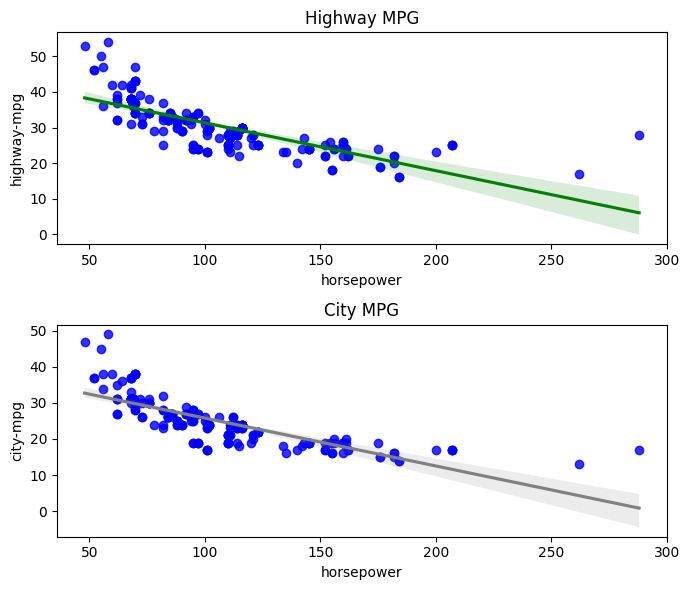

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(7, 6))

# highway MPG
sns.regplot(ax = axes[0], x=ae['horsepower'], y=ae['highway-mpg'],scatter_kws={"color": "blue"}, line_kws={"color": "green"})
axes[0].set_title('Highway MPG')

# city MPG
sns.regplot(ax = axes[1], x=ae['horsepower'], y=ae['city-mpg'],scatter_kws={"color": "blue"}, line_kws={"color": "gray"})
axes[1].set_title('City MPG')

plt.tight_layout()

plt.show()

**ENGINE SIZE**

This plot suggests that there is a ***negative correlation between a car's engine size and mpg***.

Cars that have bigger engine displacement consumes bigger amount of fuel therefore having lesser mpg than small engines.

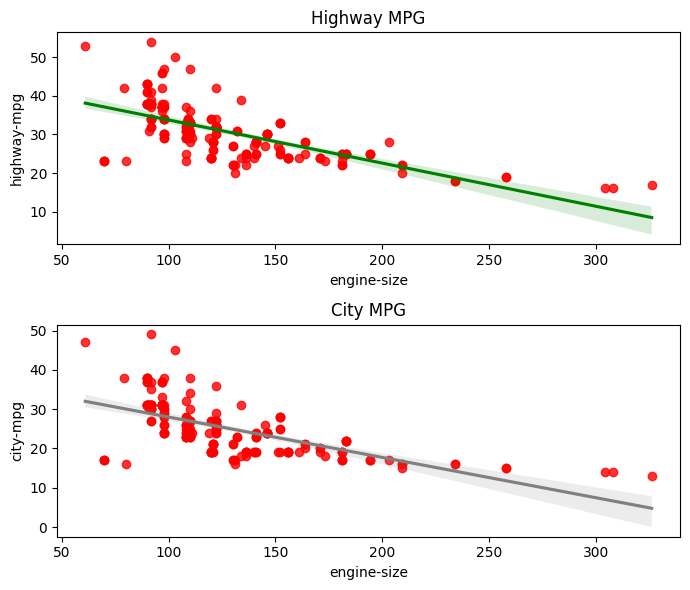

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(7, 6))

# highway MPG
sns.regplot(ax=axes[0], data=ae, x='engine-size', y='highway-mpg',
            scatter_kws={"color": "red"}, line_kws={"color": "green"})
axes[0].set_title('Highway MPG')

# city MPG
sns.regplot(ax=axes[1], data=ae, x='engine-size', y='city-mpg',
            scatter_kws={"color": "red"}, line_kws={"color": "gray"})
axes[1].set_title('City MPG')

plt.tight_layout()

plt.show()

**WHEELBASE**

This plot suggests that there might be a slight ***negative correlation between a car's wheelbase and mpg***.

The bigger wheels a car has, the less fuel efficient it is thus having lower miles per gallon.

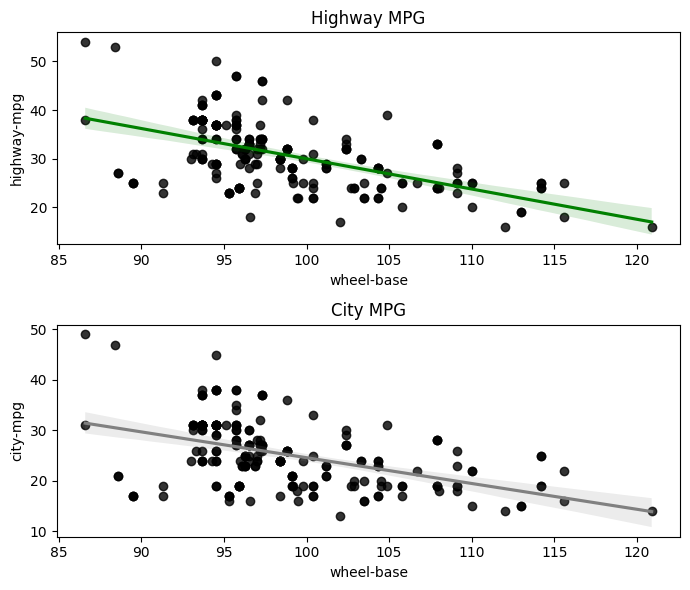

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(7, 6))

# highway MPG
sns.regplot(ax=axes[0], data=ae, x='wheel-base', y='highway-mpg',
            scatter_kws={"color": "black"}, line_kws={"color": "green"})
axes[0].set_title('Highway MPG')

# city MPG
sns.regplot(ax=axes[1], data=ae, x='wheel-base', y='city-mpg',
            scatter_kws={"color": "black"}, line_kws={"color": "gray"})
axes[1].set_title('City MPG')

plt.tight_layout()

plt.show()

ALL PREVIOUS REGRESSIONS SEEM TO BE NEGATIVE LET'S HAVE A POSITIVE REGRESSION :D


**engine size to power**

the bigger engine a car has the more horsepower it can get.

**number of cylinders  to power**

the more the cylinders of an engine the greater power it can give to the car.

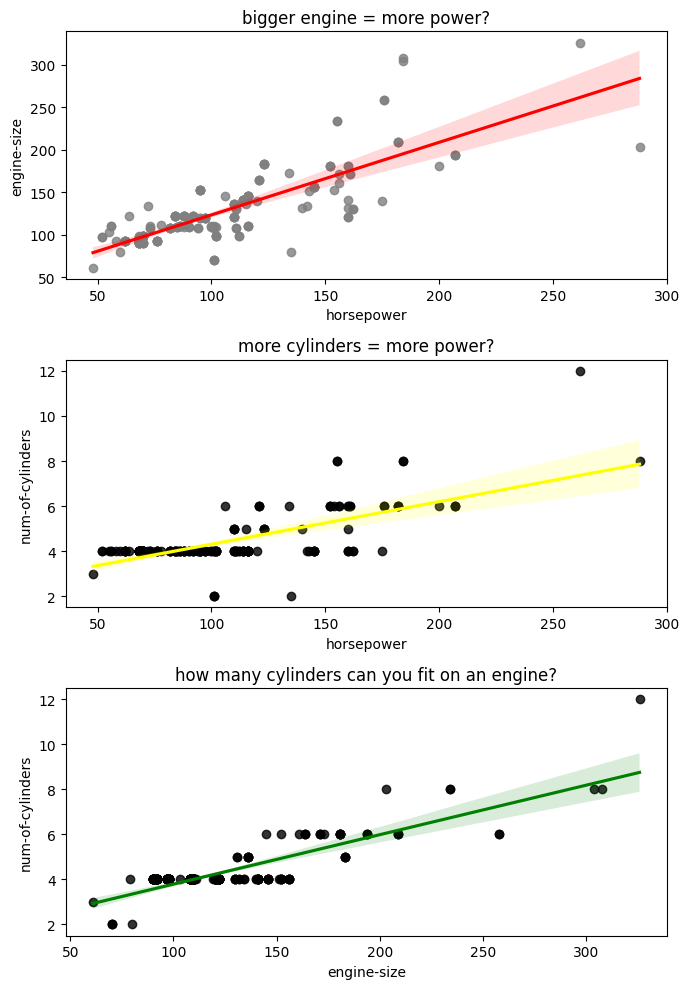

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(7, 10))

sns.regplot(ax=axes[0], data=ae, x='horsepower', y='engine-size',
            scatter_kws={"color": "gray"}, line_kws={"color": "red"})
axes[0].set_title('bigger engine = more power?')

sns.regplot(ax=axes[1], data=ae, x='horsepower', y='num-of-cylinders',
            scatter_kws={"color": "black"}, line_kws={"color": "yellow"})
axes[1].set_title('more cylinders = more power?')

sns.regplot(ax=axes[2], data=ae, x='engine-size', y='num-of-cylinders',
            scatter_kws={"color": "black"}, line_kws={"color": "green"})
axes[2].set_title('how many cylinders can you fit on an engine?')

plt.tight_layout()

plt.show()

**how many cylinders can fit in a engine**

assuming the engine size is in cubic inches, the maximum size is 326, which is around 5.3 liters, and we can see in the plot that there one car that has 12 cylinders in a 5.3 liter engine.

in the dataset, the maximum possible cylinders inside a 5.3 liter engine is 12.

In [ ]:
aefc = ae.drop(['fuel-system', 'engine-type', 'engine-location', 'drive-wheels', 'body-style', 'aspiration', 'fuel-type', 'make'],axis=1)
#for correlation

In [ ]:
aefc

price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0    13495.0           27        21    5000.0       111.0                9.0   
1    16500.0           27        21    5000.0       111.0                9.0   
2    16500.0           26        19    5000.0       154.0                9.0   
3    13950.0           30        24    5500.0       102.0               10.0   
4    17450.0           22        18    5500.0       115.0                8.0   
..       ...          ...       ...       ...         ...                ...   
200  16845.0           28        23    5400.0       114.0                9.5   
201  19045.0           25        19    5300.0       160.0                8.7   
202  21485.0           23        18    5500.0       134.0                8.8   
203  22470.0           27        26    4800.0       106.0               23.0   
204  22625.0           25        19    5400.0       114.0                9.5   

     stroke  bore  engine-size  num-of-cylinders  curb-weight  height  width  \
0      2.68  3.47          130                 4         2548    48.8   64.1   
1      2.68  3.47          130                 4         2548    48.8   64.1   
2      3.47  2.68          152                 6         2823    52.4   65.5   
3      3.40  3.19          109                 4         2337    54.3   66.2   
4      3.40  3.19          136                 5         2824    54.3   66.4   
..      ...   ...          ...               ...          ...     ...    ...   
200    3.15  3.78          141                 4         2952    55.5   68.9   
201    3.15  3.78          141                 4         3049    55.5   68.8   
202    2.87  3.58          173                 6         3012    55.5   68.9   
203    3.40  3.01          145                 6         3217    55.5   68.9   
204    3.15  3.78          141                 4         3062    55.5   68.9   

     length  wheel-base  num-of-doors  normalized-losses  symboling  
0     168.8        88.6           2.0                NaN          3  
1     168.8        88.6           2.0                NaN          3  
2     171.2        94.5           2.0                NaN          1  
3     176.6        99.8           4.0              164.0          2  
4     176.6        99.4           4.0              164.0          2  
..      ...         ...           ...                ...        ...  
200   188.8       109.1           4.0               95.0         -1  
201   188.8       109.1           4.0               95.0         -1  
202   188.8       109.1           4.0               95.0         -1  
203   188.8       109.1           4.0               95.0         -1  
204   188.8       109.1           4.0               95.0         -1  

[205 rows x 18 columns]

In [ ]:
aefc.corr()

price  highway-mpg  city-mpg  peak-rpm  horsepower  \
price              1.000000    -0.704692 -0.686571 -0.101649    0.810533   
highway-mpg       -0.704692     1.000000  0.971337 -0.054257   -0.770908   
city-mpg          -0.686571     0.971337  1.000000 -0.113788   -0.803620   
peak-rpm          -0.101649    -0.054257 -0.113788  1.000000    0.130971   
horsepower         0.810533    -0.770908 -0.803620  0.130971    1.000000   
compression-ratio  0.071107     0.265201  0.324701 -0.436221   -0.205874   
stroke             0.082310    -0.044528 -0.042906 -0.071493    0.090254   
bore               0.543436    -0.594572 -0.594584 -0.264269    0.577273   
engine-size        0.872335    -0.677470 -0.653658 -0.244618    0.810773   
num-of-cylinders   0.708645    -0.466666 -0.445837 -0.124434    0.691633   
curb-weight        0.834415    -0.797465 -0.757414 -0.266306    0.751034   
height             0.135486    -0.107358 -0.048640 -0.322272   -0.110711   
width              0.751265    -0.677218 -0.642704 -0.219957    0.642482   
length             0.690628    -0.704662 -0.670909 -0.287325    0.555003   
wheel-base         0.584642    -0.544082 -0.470414 -0.361052    0.352297   
num-of-doors       0.046532    -0.044507 -0.020812 -0.242485   -0.124963   
normalized-losses  0.203254    -0.210768 -0.258502  0.264597    0.295772   
symboling         -0.082391     0.034606 -0.035823  0.274573    0.071622   

                   compression-ratio    stroke      bore  engine-size  \
price                       0.071107  0.082310  0.543436     0.872335   
highway-mpg                 0.265201 -0.044528 -0.594572    -0.677470   
city-mpg                    0.324701 -0.042906 -0.594584    -0.653658   
peak-rpm                   -0.436221 -0.071493 -0.264269    -0.244618   
horsepower                 -0.205874  0.090254  0.577273     0.810773   
compression-ratio           1.000000  0.186170  0.005203     0.028971   
stroke                      0.186170  1.000000 -0.055909     0.206675   
bore                        0.005203 -0.055909  1.000000     0.594090   
engine-size                 0.028971  0.206675  0.594090     1.000000   
num-of-cylinders           -0.020002  0.008578  0.243553     0.846031   
curb-weight                 0.151362  0.168929  0.649045     0.850594   
height                      0.261214 -0.056999  0.176195     0.067149   
width                       0.181129  0.182956  0.559204     0.735433   
length                      0.158414  0.129739  0.607480     0.683360   
wheel-base                  0.249786  0.161477  0.490378     0.569329   
num-of-doors                0.165799 -0.010697  0.114501     0.017519   
normalized-losses          -0.132654  0.065627 -0.036167     0.167365   
symboling                  -0.178515 -0.008965 -0.134205    -0.105790   

                   num-of-cylinders  curb-weight    height     width  \
price                      0.708645     0.834415  0.135486  0.751265   
highway-mpg               -0.466666    -0.797465 -0.107358 -0.677218   
city-mpg                  -0.445837    -0.757414 -0.048640 -0.642704   
peak-rpm                  -0.124434    -0.266306 -0.322272 -0.219957   
horsepower                 0.691633     0.751034 -0.110711  0.642482   
compression-ratio         -0.020002     0.151362  0.261214  0.181129   
stroke                     0.008578     0.168929 -0.056999  0.182956   
bore                       0.243553     0.649045  0.176195  0.559204   
engine-size                0.846031     0.850594  0.067149  0.735433   
num-of-cylinders           1.000000     0.609727 -0.013995  0.545007   
curb-weight                0.609727     1.000000  0.295572  0.867032   
height                    -0.013995     0.295572  1.000000  0.279210   
width                      0.545007     0.867032  0.279210  1.000000   
length                     0.430672     0.877728  0.491029  0.841118   
wheel-base                 0.339507     0.776386  0.589435  0.795144   
num-of-doors              -0.016530  

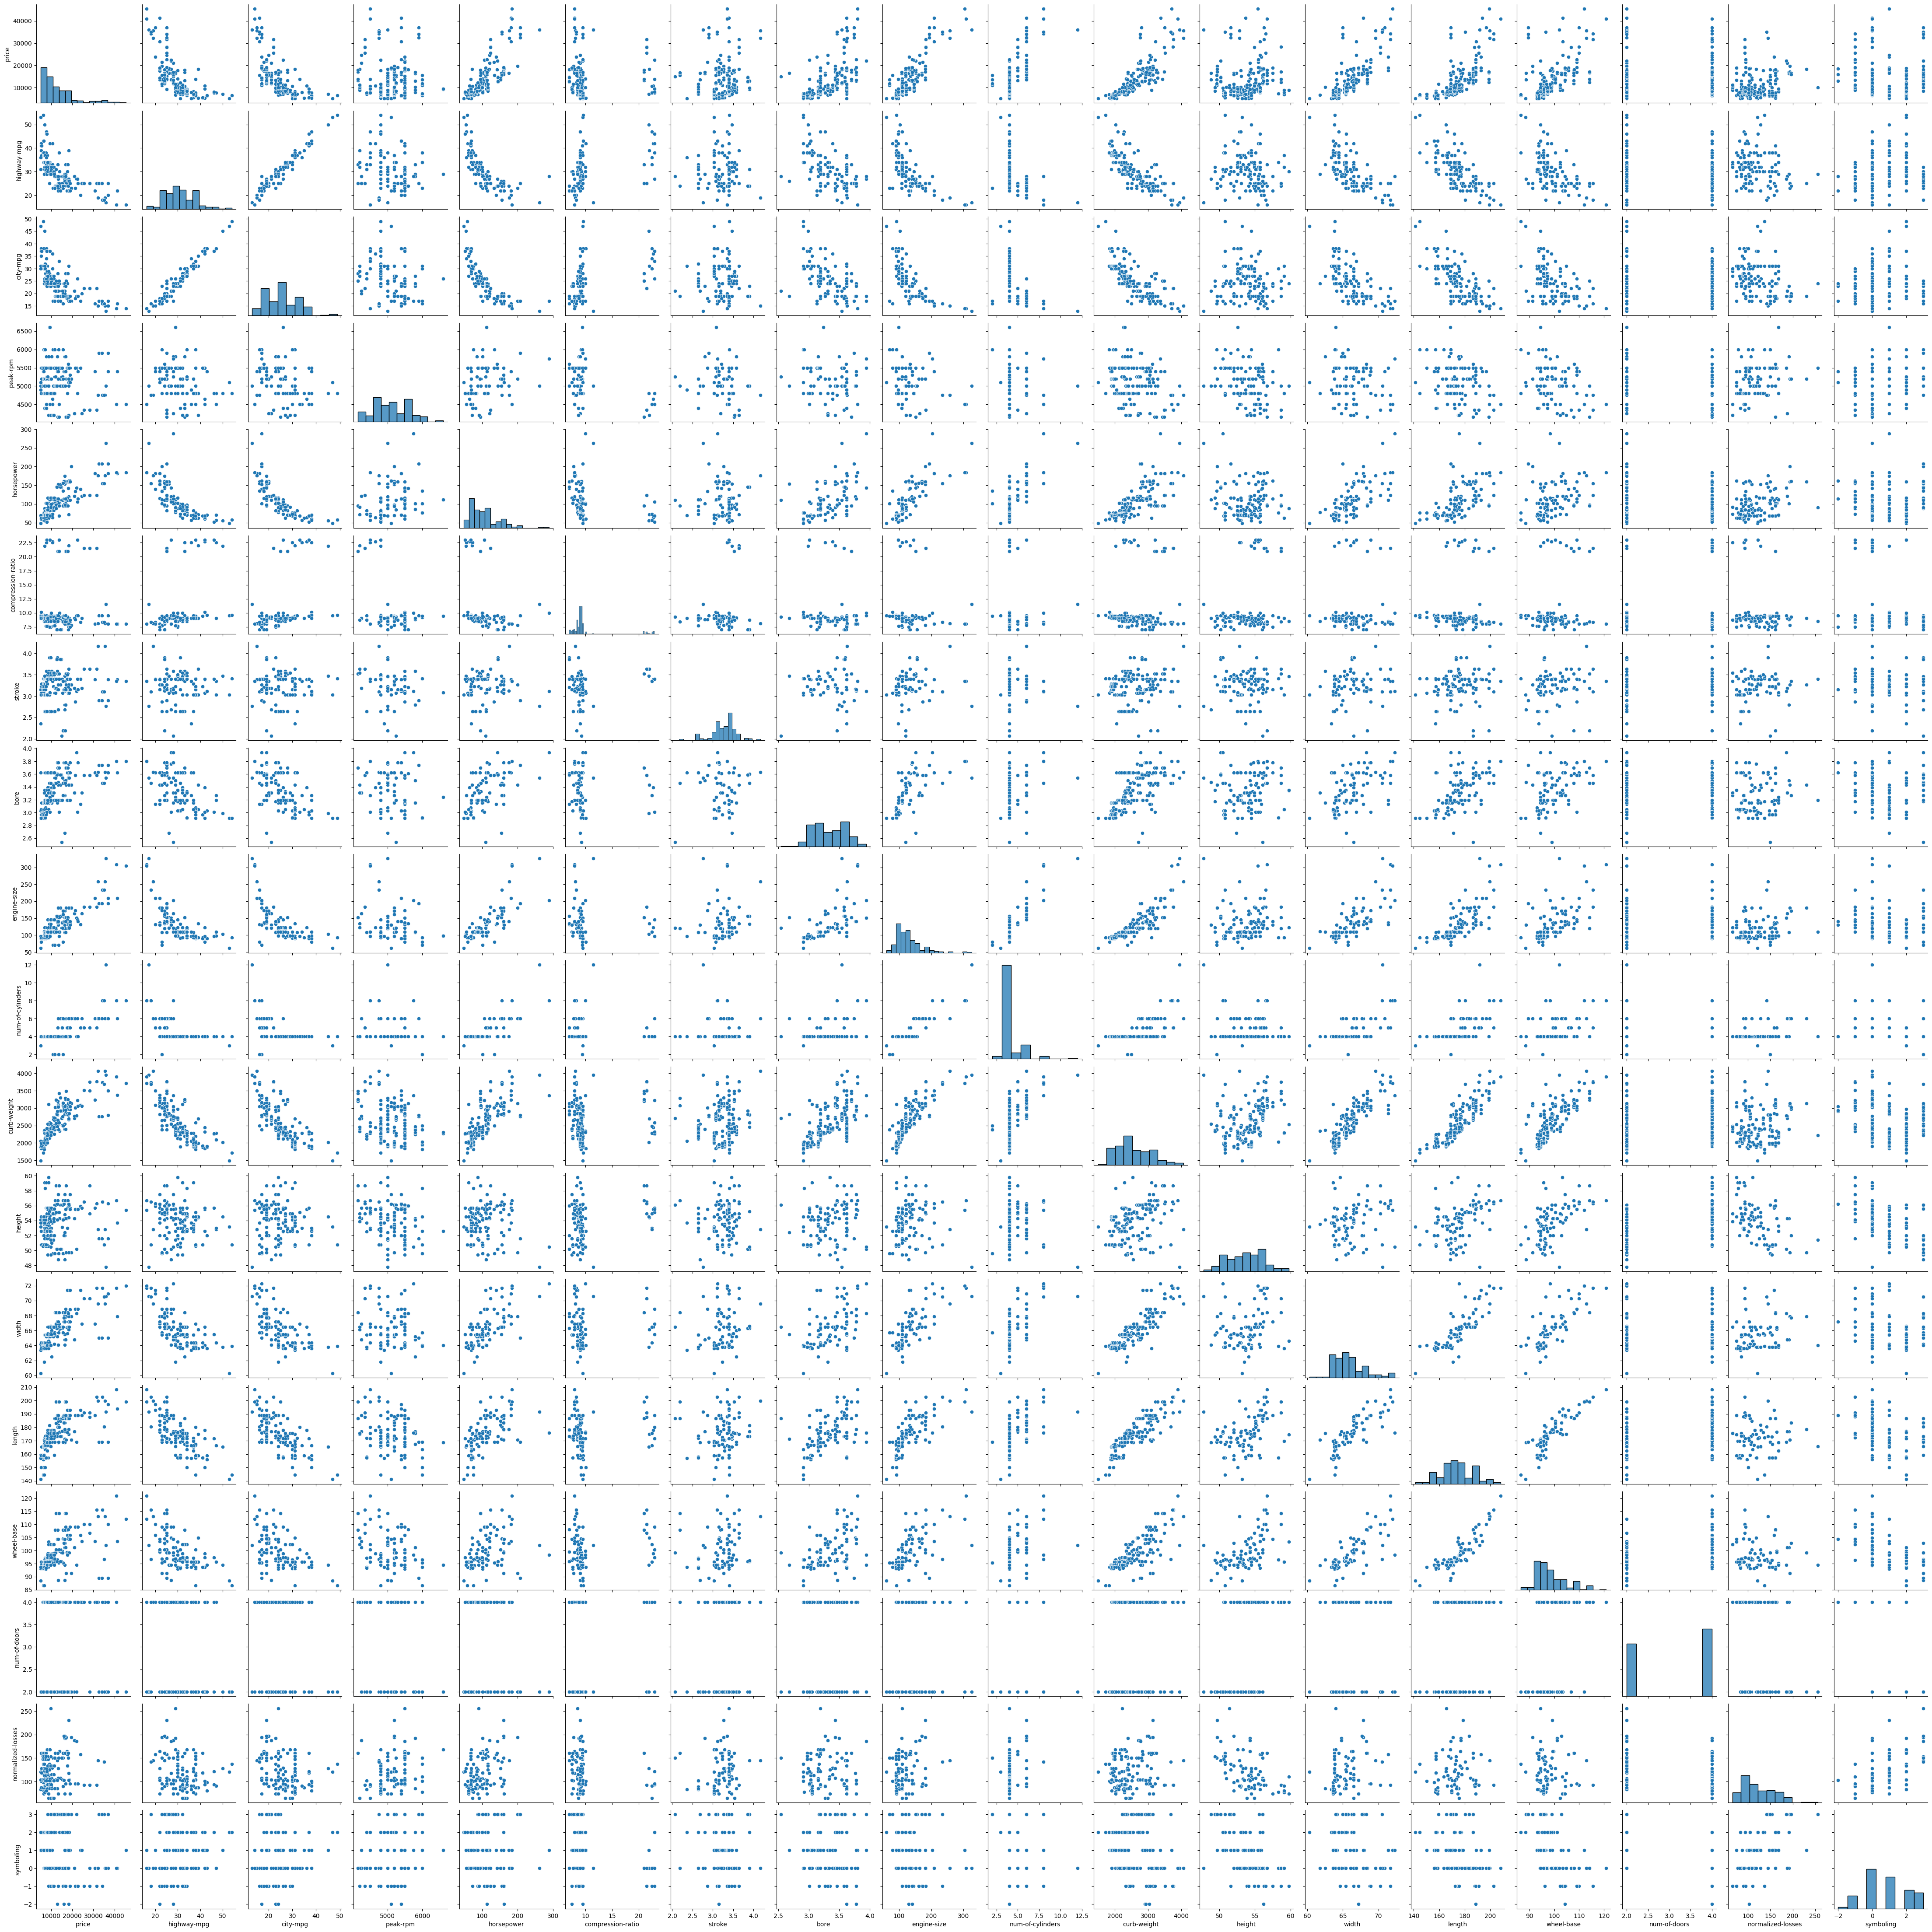

In [ ]:
sns.pairplot(ae)

<Axes: >

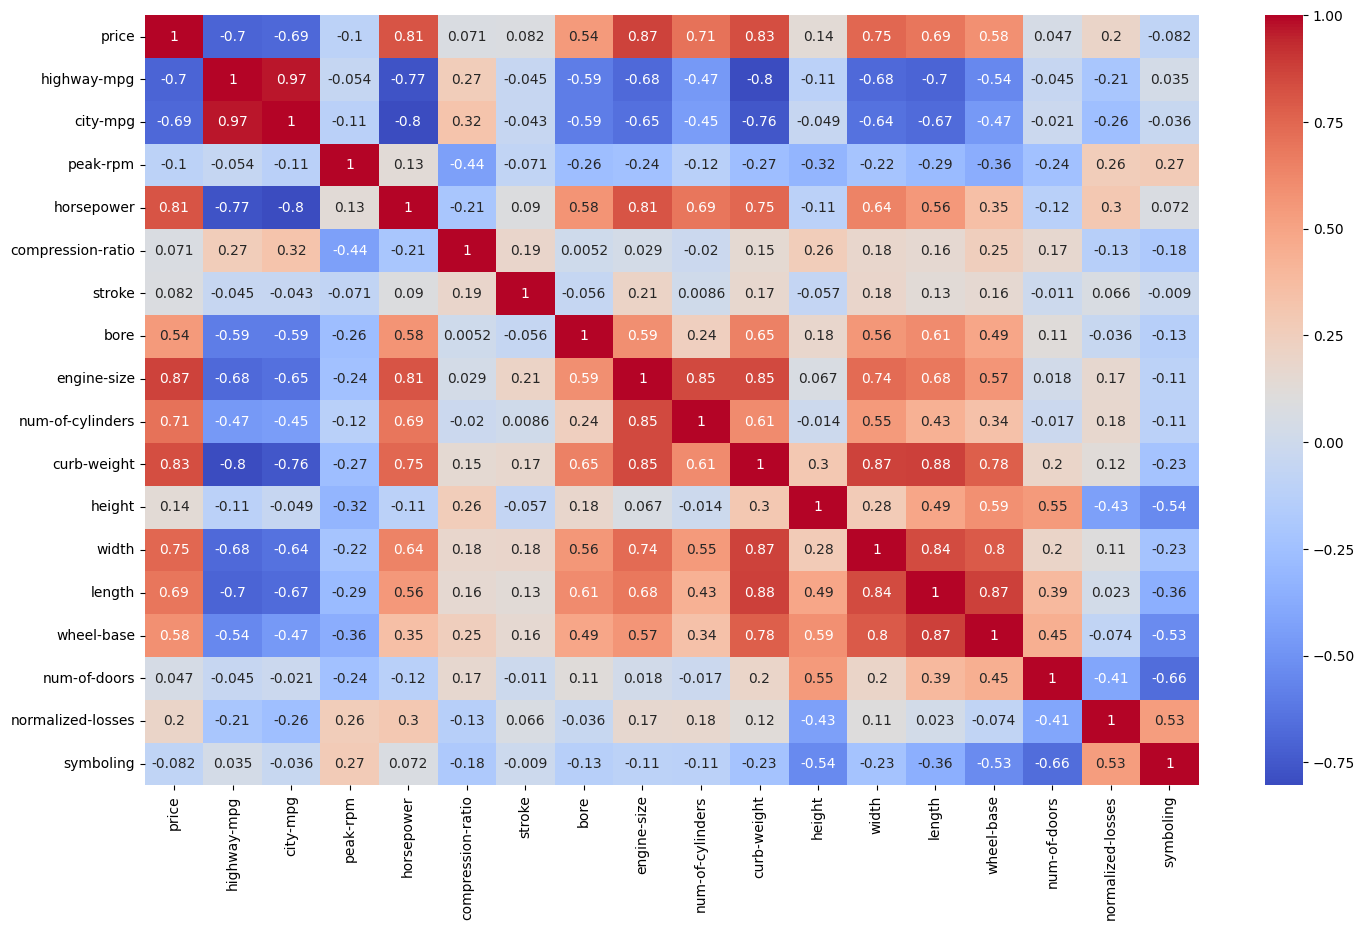

In [ ]:
plt.figure(figsize=(17, 10))
aehm = sns.heatmap(aefc.corr(), annot=True, cmap='coolwarm')
aehm

_________________________________________
_________________________________________
_________________________________________
_________________________________________
_________________________________________

#LOGISTIC REGERESSION ANALYSIS (WINE)

#import

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
Xlow = wine.data.features
ylow = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

# DATA PRE-PROCESSING + EDA

In [ ]:
Xlow

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     0D280_0D315_of_diluted_wines  Proline  
0                            3.92     1065  
1                            3.40     1050  
2                            3.17     1185  
3                            3.45     1480  
4                            2.93      735  
..                            ...      ...  
173                          1.74      740  
174                          1.56      750  
175                          1.56      835  
176                          1.62      840  
177                          1.60      560  

[178 rows x 13 columns]

In [ ]:
ylow

class
0        1
1        1
2        1
3        1
4        1
..     ...
173      3
174      3
175      3
176      3
177      3

[178 rows x 1 columns]

In [ ]:
we = pd.concat([Xlow,ylow], axis=1)

In [ ]:
we

Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     0D280_0D315_of_diluted_wines  Proline  class  
0                            3.92     1065      1  
1                            3.40     1050      1  
2                            3.17     1185      1  
3                            3.45     1480      1  
4                            2.93      735      1  
..                            ...      ...    ...  
173                          1.74      740      3  
174                          1.56      750      3  
175                          1.56      835      3  
176                          1.62      840      3  
177                          1.60      560      3  

[178 rows x 14 columns]

In [ ]:
we.info()
print('\n',we.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

**Class and Flavanoid**

Wines that are higher class tend to have higher flavanoid content, possibly from the grapes used to make the wine grow to conditions that leads to more flavanoids.

Wines that are lower class  have lower flavanoid content, probably due to the processing techniques to produce the wine.

([<matplotlib.axis.YTick at 0x7af2837f9d50>,
 [Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

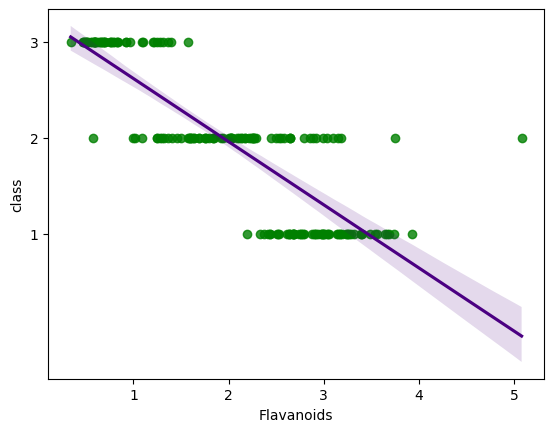

In [ ]:
sns.regplot(x=we['Flavanoids'], y=we['class'],scatter_kws={"color": "green"}, line_kws={"color": "indigo"})
plt.yticks(we['class'].unique())

([<matplotlib.axis.YTick at 0x7af283272680>,
 [Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

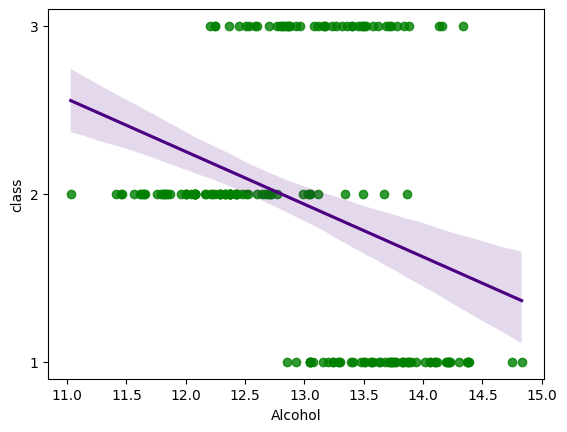

In [ ]:
sns.regplot(x=we['Alcohol'], y=we['class'],scatter_kws={"color": "green"}, line_kws={"color": "indigo"})
plt.yticks(we['class'].unique())

In [ ]:
we.describe()

Alcohol   Malicacid         Ash  Alcalinity_of_ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_intensity         Hue  0D280_0D315_of_diluted_wines      Proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

            class  
count  178.000000  
mean     1.938202  
std      0.775035  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000

In [ ]:
wefhm = we.corr()
wefhm

Alcohol  Malicacid       Ash  \
Alcohol                       1.000000   0.094397  0.211545   
Malicacid                     0.094397   1.000000  0.164045   
Ash                           0.211545   0.164045  1.000000   
Alcalinity_of_ash            -0.310235   0.288500  0.443367   
Magnesium                     0.270798  -0.054575  0.286587   
Total_phenols                 0.289101  -0.335167  0.128980   
Flavanoids                    0.236815  -0.411007  0.115077   
Nonflavanoid_phenols         -0.155929   0.292977  0.186230   
Proanthocyanins               0.136698  -0.220746  0.009652   
Color_intensity               0.546364   0.248985  0.258887   
Hue                          -0.071747  -0.561296 -0.074667   
0D280_0D315_of_diluted_wines  0.072343  -0.368710  0.003911   
Proline                       0.643720  -0.192011  0.223626   
class                        -0.328222   0.437776 -0.049643   

                              Alcalinity_of_ash  Magnesium  Total_phenols  \
Alcohol                               -0.310235   0.270798       0.289101   
Malicacid                              0.288500  -0.054575      -0.335167   
Ash                                    0.443367   0.286587       0.128980   
Alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
Magnesium                             -0.083333   1.000000       0.214401   
Total_phenols                         -0.321113   0.214401       1.000000   
Flavanoids                            -0.351370   0.195784       0.864564   
Nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
Proanthocyanins                       -0.197327   0.236441       0.612413   
Color_intensity                        0.018732   0.199950      -0.055136   
Hue                                   -0.273955   0.055398       0.433681   
0D280_0D315_of_diluted_wines          -0.276769   0.066004       0.699949   
Proline                               -0.440597   0.393351       0.498115   
class                                  0.517859  -0.209179      -0.719163   

                              Flavanoids  Nonflavanoid_phenols  \
Alcohol                         0.236815             -0.155929   
Malicacid                      -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcalinity_of_ash              -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total_phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid_phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color_intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
0D280_0D315_of_diluted_wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   
class                          -0.847498              0.489109   

                              Proanthocyanins  Color_intensity       Hue  \
Alcohol                              0.136698         0.546364 -0.071747   
Malicacid                           -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total_phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins                      1.000000        -0.025250  0.295544   
Color_intensity                     -0.025250         1.000000 -0.521813   
Hue                                  0.295544        -0.521813  1.000000   
0D280_0D315_of_diluted_win

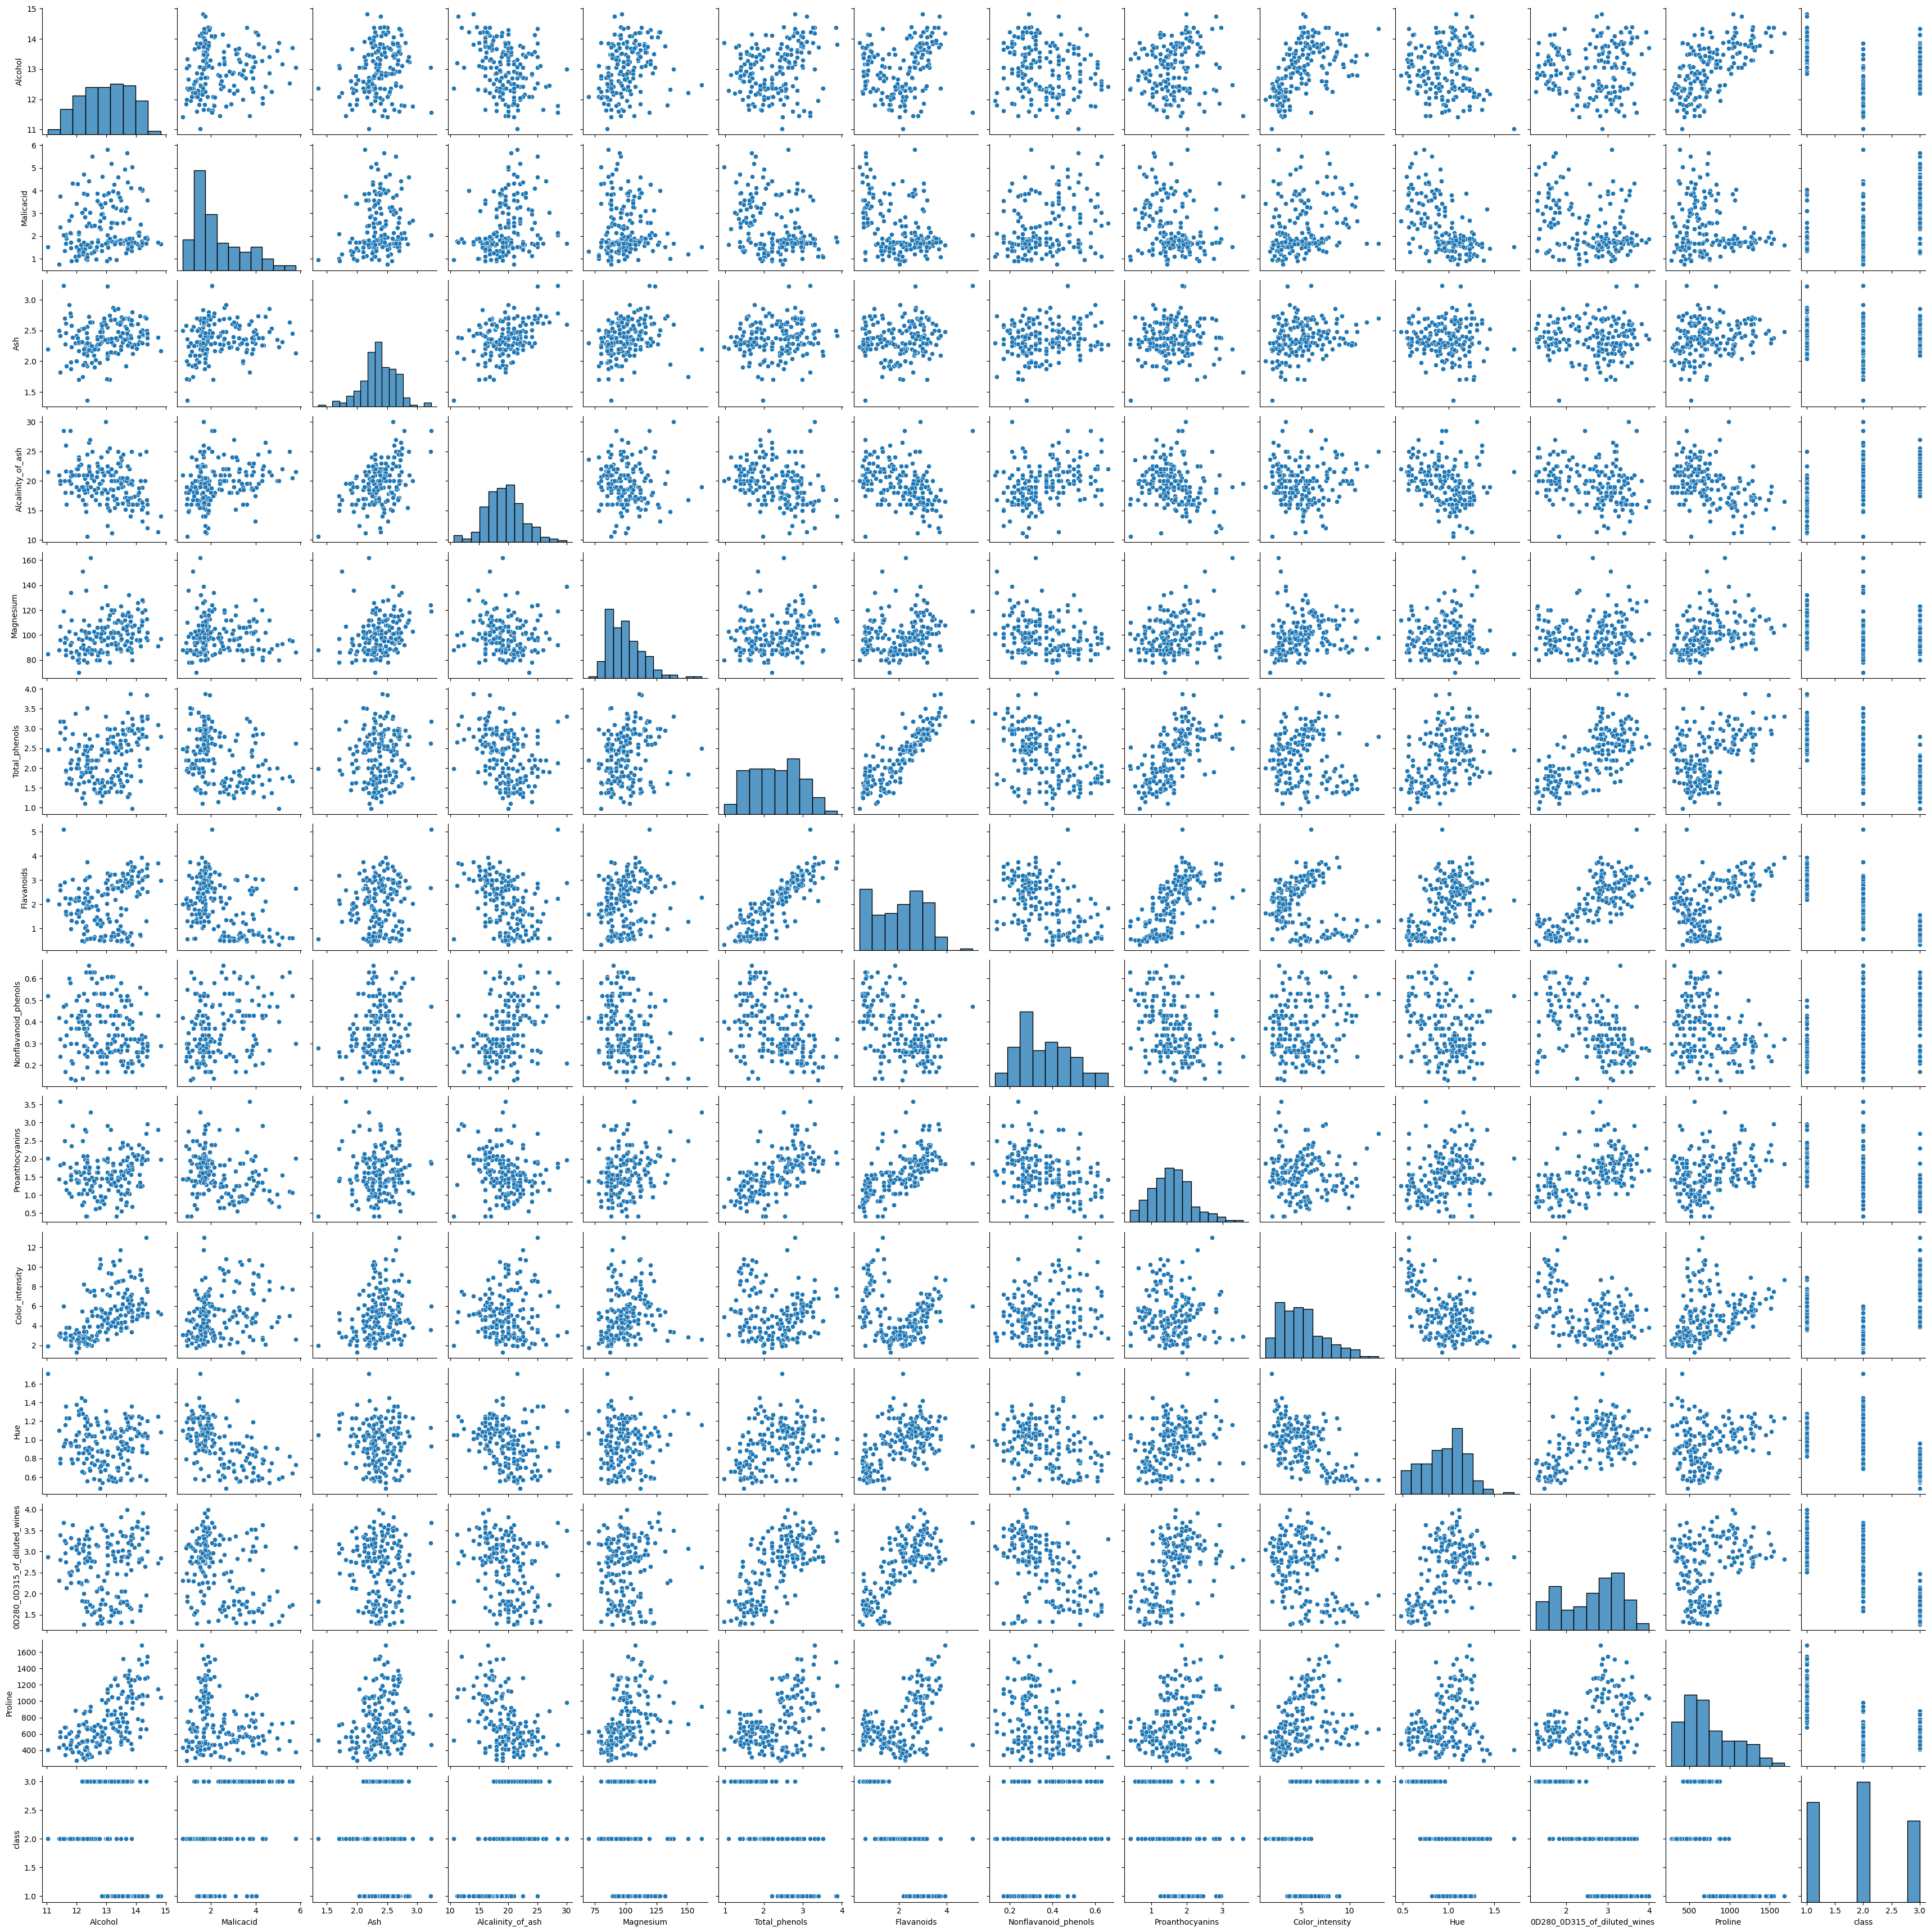

In [ ]:
sns.pairplot(we)

<Axes: >

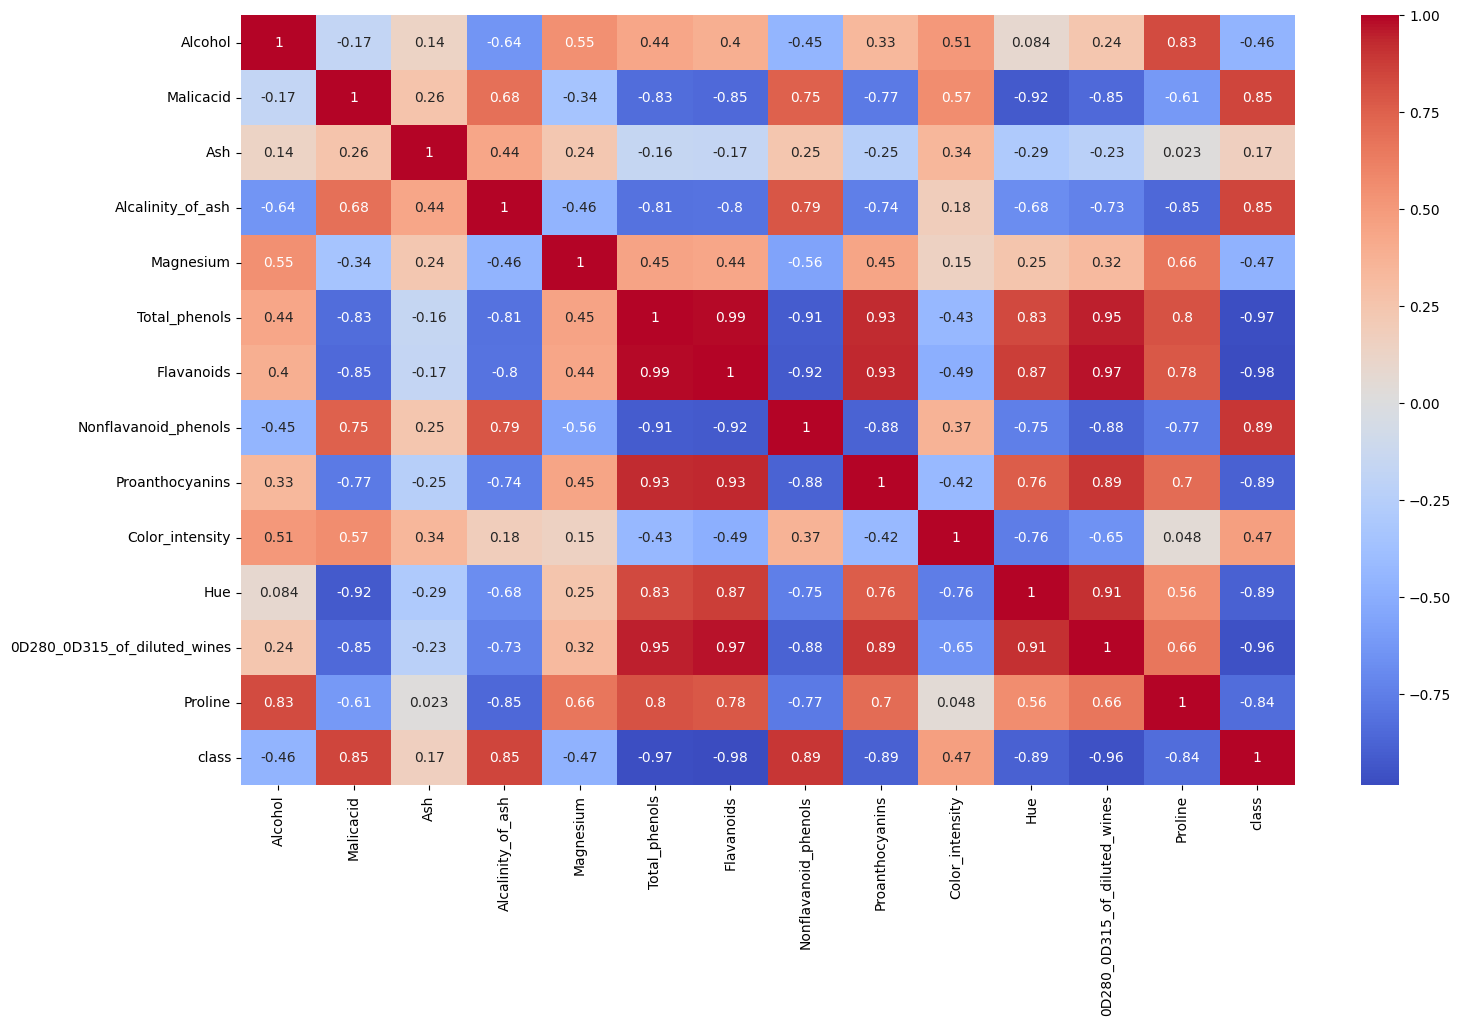

In [ ]:
plt.figure(figsize=(17, 10))
wehm = sns.heatmap(wefhm.corr(), annot=True, cmap='coolwarm')
wehm